## Question 1:

In [68]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn.metrics import accuracy_score 

iris = datasets.load_iris()
data = iris.data

# create features of ratios of the lengths and widths of the sepals and pedals
length_rat = [l/w for l,w in zip(data[:,0],data[:,2])]
width_rat = [l/w for l,w in zip(data[:,1],data[:,3])]

X = [[x1,x2] for x1,x2 in zip(length_rat,width_rat)]
y = iris.target

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

clf = svm.SVC()
clf.fit(X_train, y_train)

acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9333333333333333


## Question 2:
Pairplot cannot be used to visualize this data because of the high dimensionality of the input.

941 6's were correctly identified out of 958.


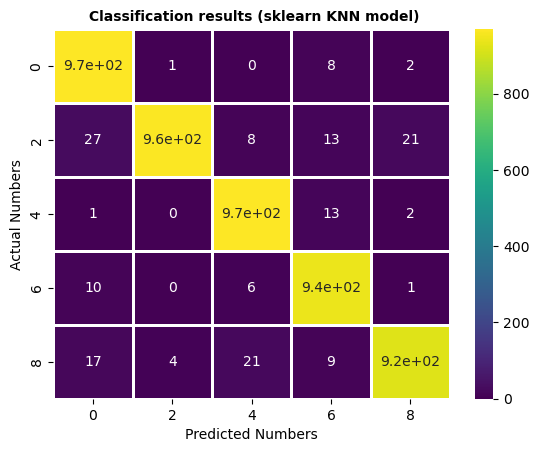

In [69]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
import pandas as pd # type: ignore

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def gen_even_sets(x_train, y_train, x_test, y_test):
    even_x_train = []
    even_y_train = []
    even_x_test = []
    even_y_test = []


    for data, num in zip(x_train, y_train):
        if num%2 == 0:
            even_x_train.append(data.flatten())
            even_y_train.append(num)

    for data, num in zip(x_test, y_test):
        if num%2 == 0:
            even_x_test.append(data.flatten())
            even_y_test.append(num)

    even_x_train = np.array(even_x_train)
    even_y_train = np.array(even_y_train)
    even_x_test = np.array(even_x_test)
    even_y_test = np.array(even_y_test)

    return (even_x_train,even_y_train,even_x_test,even_y_test)


even_x_train, even_y_train, even_x_test, even_y_test = gen_even_sets(x_train, y_train, x_test, y_test)

knn_model = KNeighborsClassifier(n_neighbors = int(even_x_train.shape[0]**0.5))

knn_model.fit(even_x_train,even_y_train)
cm = confusion_matrix(even_y_test, knn_model.predict(even_x_test))
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True)

targets = ['0','2','4','6','8']
ax.set_xticklabels(targets)
ax.set_yticklabels(targets)

plt.xlabel("Predicted Numbers")
plt.ylabel("Actual Numbers")
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold')

print("%d 6\'s were correctly identified out of %d." %(cm[3,3],sum(cm[3,:])))





## Question 3

c:\Users\Patrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Patrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Patrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Patrick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

Text(0.5, 0.92, 'k = 5')

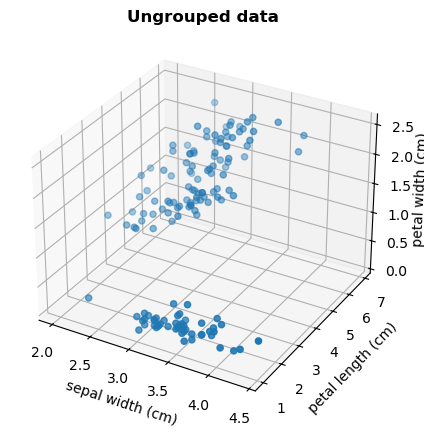

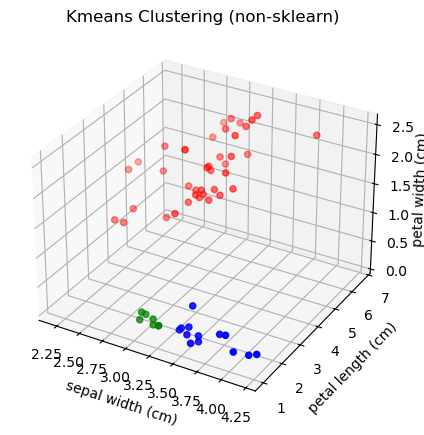

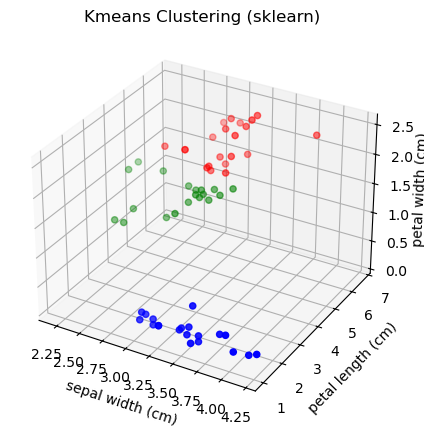

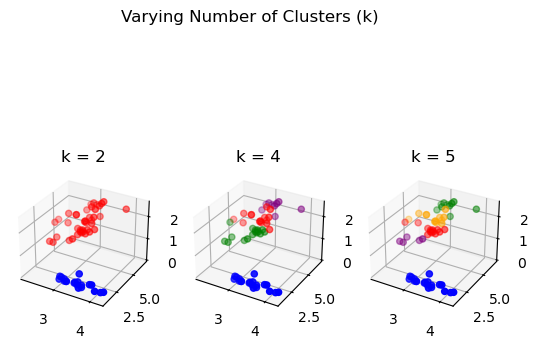

In [42]:
import numpy as np
import pandas as pd # type:ignore
from sklearn.cluster import KMeans as skKmeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
import matplotlib .pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Kmeans:

    def __init__(self, k):
        self.k = k
        self.cluster_labels = np.arange(k)

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0],self.k,replace=False),:]
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]
    

iris = load_iris()
data = iris.data[:,1:]
tags = iris.feature_names[1:]
y = iris.target

color_map = ['red','blue','green','purple','orange']

X_train, X_test, y_train, y_test=train_test_split(
    data,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

kmeans_model = Kmeans(3)
kmeans_model.fit(X_train)
preds = kmeans_model.predict(X_test)

sk_kmeans_model = skKmeans(3)
sk_kmeans_model.fit(X_train)
preds_sk = sk_kmeans_model.predict(X_test)

sk_kmeans_model2 = skKmeans(2)
sk_kmeans_model4 = skKmeans(4)
sk_kmeans_model5 = skKmeans(5)

sk_kmeans_model2.fit(X_train)
preds2 = sk_kmeans_model2.predict(X_test)
sk_kmeans_model4.fit(X_train)
preds4 = sk_kmeans_model4.predict(X_test)
sk_kmeans_model5.fit(X_train)
preds5 = sk_kmeans_model5.predict(X_test)


ax1 = plt.figure(figsize=(20,5)).add_subplot(111, projection = '3d')
ax1.scatter(data[:,0],data[:,1],data[:,2])
ax1.set_xlabel(tags[0])
ax1.set_ylabel(tags[1])
ax1.set_zlabel(tags[2],labelpad=0)
ax1.set_title("Ungrouped data", fontweight = 'bold')

X = X_test[:,0]
Y = X_test[:,1]
Z = X_test[:,2]
c1 = [color_map[pred] for pred in preds]
c_sk = [color_map[pred] for pred in preds_sk]
c2 = [color_map[pred] for pred in preds2]
c4 = [color_map[pred] for pred in preds4]
c5 = [color_map[pred] for pred in preds5]

ax = plt.figure(figsize=(20,5)).add_subplot(111, projection = '3d')
ax.scatter(X,Y,Z,c=c1)
ax.set_xlabel(tags[0])
ax.set_ylabel(tags[1])
ax.set_zlabel(tags[2],labelpad=0)
ax.set_title("Kmeans Clustering (non-sklearn)")

ax_sk = plt.figure(figsize=(20,5)).add_subplot(111, projection = '3d')
ax_sk.scatter(X,Y,Z,c=c_sk)
ax_sk.set_xlabel(tags[0])
ax_sk.set_ylabel(tags[1])
ax_sk.set_zlabel(tags[2],labelpad=0)
ax_sk.set_title("Kmeans Clustering (sklearn)")

fig4 = plt.figure()
fig4.suptitle("Varying Number of Clusters (k)")
ax2 = fig4.add_subplot(131,projection='3d')
ax2.scatter(X,Y,Z,c=c2)
ax2.set_title("k = 2")
ax4 = fig4.add_subplot(132, projection='3d')
ax4.scatter(X,Y,Z,c=c4)
ax4.set_title("k = 4")
ax5 = fig4.add_subplot(133, projection='3d')
ax5.scatter(X,Y,Z,c=c5)
ax5.set_title("k = 5")


